In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical


In [3]:
X_train=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv')
X_test=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv')
y_train=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv')
y_test=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv')

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [4]:
print(y_train.shape)
y_train = y_train.values.reshape(13439,)
print(y_train.shape)


(13439, 1)
(13439,)


In [5]:
print(y_train[0])

1


(13439, 1024)
(3359, 1024)
(13439,)
(3359, 1)


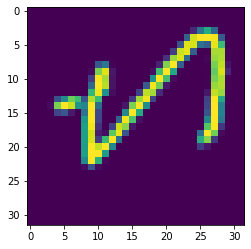

[ 1  1  1 ... 28 28 28]


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.values.reshape(-1,32,32,1)
X_test = X_test.values.reshape(-1,32,32,1)

plt.imshow(X_train[500])
plt.show()
print(y_train)

In [7]:
y_train = to_categorical(y_train, num_classes = 29)


In [8]:
print(y_train.shape)

(13439, 29)


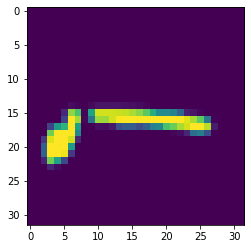

In [9]:
g = plt.imshow(X_train[0][:,:,0])

In [23]:
model = keras.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(29, activation = "softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
print(X_train.shape)

(13439, 32, 32, 1)


In [25]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=20)

Epoch 1/20
420/420 [==============================] - 3s 6ms/step - loss: 2.6010 - accuracy: 0.2249 - val_loss: 0.8812 - val_accuracy: 0.7321
Epoch 2/20
420/420 [==============================] - 3s 6ms/step - loss: 1.0852 - accuracy: 0.6344 - val_loss: 0.5313 - val_accuracy: 0.8470
Epoch 3/20
420/420 [==============================] - 2s 5ms/step - loss: 0.7344 - accuracy: 0.7608 - val_loss: 0.3836 - val_accuracy: 0.8887
Epoch 4/20
420/420 [==============================] - 2s 6ms/step - loss: 0.5451 - accuracy: 0.8170 - val_loss: 0.3338 - val_accuracy: 0.8988
Epoch 5/20
420/420 [==============================] - 2s 5ms/step - loss: 0.4562 - accuracy: 0.8441 - val_loss: 0.2803 - val_accuracy: 0.9149
Epoch 6/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3911 - accuracy: 0.8677 - val_loss: 0.2263 - val_accuracy: 0.9339
Epoch 7/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3260 - accuracy: 0.8876 - val_loss: 0.2186 - val_accuracy: 0.9339
Epoch 

In [14]:
y_test = to_categorical(y_test, num_classes = 29)


In [19]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

105/105 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9649
0.18480923771858215 0.9648705124855042


In [36]:
results = model.predict(X_test)


[9.87549592e-18 5.38132263e-14 1.19433597e-13 1.51703716e-04
 9.95368123e-01 6.02713495e-12 7.49958025e-14 1.46979494e-06
 1.81348949e-15 1.51793154e-06 1.44082802e-17 2.51852921e-08
 3.02764371e-14 3.28044128e-03 5.52256316e-17 7.39428359e-08
 4.15067320e-16 6.72628842e-10 8.38149772e-10 7.84221811e-07
 1.03983621e-03 5.36385487e-05 9.28471244e-10 3.93323171e-14
 1.55230497e-19 1.02395614e-04 6.99447515e-17 3.33499572e-15
 1.66208644e-11]


6
6


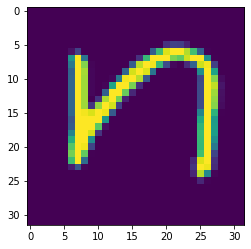

In [45]:
print(results[66].argmax())
print(y_test[66].argmax())

g = plt.imshow(X_test[66][:,:,0])

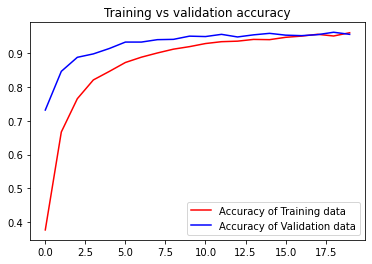

<Figure size 432x288 with 0 Axes>

In [27]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()